In [1]:
import pymongo
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
client=pymongo.MongoClient('localhost',27017)
qingxiang = client['qingxiang']
lz_info=qingxiang['lz_info']

In [3]:
df=pd.DataFrame(list(lz_info.find({},{'_id':0})))

In [4]:
df.shape

(15038, 9)

In [5]:
df.head()

,description,hot,nickname,planId,tags,title,uid,url,witness
0,在这个连载，你可以把每天见到的有趣的风景记录下来。,2,习惯不曾习惯的习惯wo,105800,[],每日一拍,193644,http://www.lianzai.me/planDetail/193644/105800...,0
1,人体练习100天,250,一位正襟危坐的外星友人,84176,[],人体练习100天,105630,http://www.lianzai.me/planDetail/105630/84176....,16
2,在这个连载，你可以把每天见到的有趣的风景记录下来。,4,阿沅,104379,[],沅映像,193939,http://www.lianzai.me/planDetail/193939/104379...,0
3,人体练习！加油！,10,鲶鱼叽,106078,"[绘画人体练习, 练习人体100天, 人体练习]",人体练习100天,102165,http://www.lianzai.me/planDetail/102165/106078...,0
4,在这个连载，你可以把每天见到的有趣的风景记录下来。,11,C.Tommy,94832,"[摄影, 日记, 手机摄影, 生活]",扌聂 景彡 生 氵舌,195950,http://www.lianzai.me/planDetail/195950/94832....,0


In [6]:
df=df.reindex(columns=['nickname','uid','planId','hot','witness','tags','title','description','url'])

In [7]:
len(df.uid.unique())

7400

共（发起过连载的）用户有7400人

In [8]:
len(df.planId.unique()) # 共有独立连载15029起。

15029

因为数据量不算充足，用户的粉丝数、关注数等用户直观信息比较静态，难反映用户活跃程度,有可能粉丝数不少，但人已经流失了。所以从用户的发生的行为，即连载的情况来分析。
因为是从’最新‘这个版块下抓取的信息，用户有公开的动态更新，按照时间先后呈现在“最新”的前几页。但有的用户可能有更新连载，但该连载设置为隐私，则无法判断这部分用户活跃程度。
因此，对象讨论范围限制是：公开的连载，某一段时间内，有效的活跃用户。
更具体的：因为这1.5W个连载应该是接近全部的连载数量了，后面的连载大部分是不活跃的。几个可能的情形是：用户开的连载属于“日”记高频类，比如练习画画，每日一涂、每日早餐等，那么每天都会更新，100天就连续活跃100天；但100天后就完结了该连载，也就无法反映该用户后续的留存情况和活跃程度，需从其他维度来看。
所以用连载频率这个指标，能反映单个用户（只此用户）、某段时间内的活跃程度，不一定能反映整体以及留存（后续的活跃程度）

In [10]:
df[['uid','planId','hot','witness']]=df[['uid','planId','hot','witness']].apply(pd.to_numeric)

In [11]:
#查看连载热度（包含指标：用户更新频率和见证人浏览量）
hot=df.sort_values('hot',ascending=False)

In [12]:
hundred=hot.head(100)  # 热度百强榜。

In [14]:
hundred #前100活跃连载主题（tags）基本是绘画主题。因为其几个创始人在美术漫画领域影响力较大，个别身份也是插画师、漫画家。

,nickname,uid,planId,hot,witness,tags,title,description,url
12144,轻想连载专题,100001,10017,23515,3254,"[你的照片我来画, 绘画, 插画, 手绘, 水彩]",官方|你的照片我来画,下载最新版本“轻想连载”APP专题入口，可以进入免费投稿画照片通道哟。,http://www.lianzai.me/planDetail/100001/10017....
9234,狐狸同学,101101,13406,14788,2136,"[你的照片我来画, 插画, 绘画]",你的照片我来画,可爱的妹子or男孩子太多辣,http://www.lianzai.me/planDetail/101101/13406....
98,狐狸同学,101101,15758,12979,1582,"[漫画, 废柴狐阿桔, 阿桔]",狐阿桔-福利贴,一只废柴狐狸的日常,http://www.lianzai.me/planDetail/101101/15758....
6961,切尸红人魔,307648,15797,12776,2159,"[绘画, 插画, 涂鸦, 你的照片我来画]",切氏画像,有偿约稿请联系小编企鹅782155693,http://www.lianzai.me/planDetail/307648/15797....
2507,狐狸同学,101101,28079,12074,1553,[漫画],废柴狐阿桔,漫画：狐狸\n编剧&主编：shane-小菜 程御迦\n上色：阿柴\n协力：苏小五\n制作：轻...,http://www.lianzai.me/planDetail/101101/28079....
2456,shane-小菜,100000,10024,11688,2085,"[色彩, 插画, 教程, 原画, 漫画]",小菜绘画问答,一起学画画,http://www.lianzai.me/planDetail/100000/10024....
798,shane-小菜,100000,64794,11110,1363,"[每日一图, 人体练习, 人体训练100天, 涂鸦]",100天1000个人体3000个见证,目标是每天10个人体，100天后画漫画，给我1000个见证监督，学习资料下载http://p...,http://www.lianzai.me/planDetail/100000/64794....
142,临暗式,303940,17094,10148,604,"[脑洞, 漫画, 绘画, 插画, 原创]",杂物幻想,日常脑洞 推荐微博主：@tango2010,http://www.lianzai.me/planDetail/303940/17094....
1669,shane-小菜,100000,10367,9475,129,"[生活, 晚安, 日记, 情感]",晚安日记,想好好写日记（封面by阿梗）,http://www.lianzai.me/planDetail/100000/10367....
1310,山林食纪,104288,13800,8888,613,"[摄影, 静物, 美食]",山林食纪,曲径通幽，山林食纪。,http://www.lianzai.me/planDetail/104288/13800....


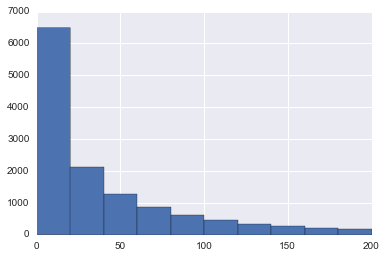

In [15]:
hot.hot.hist(bins=10,range=(0,200))

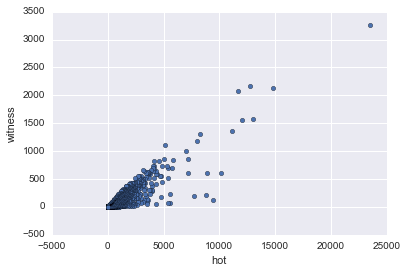

In [16]:
hot.plot(kind='scatter',
         x='hot',
         y='witness',
         )  

根据上图情况，缩放尺度，观察密集部分：

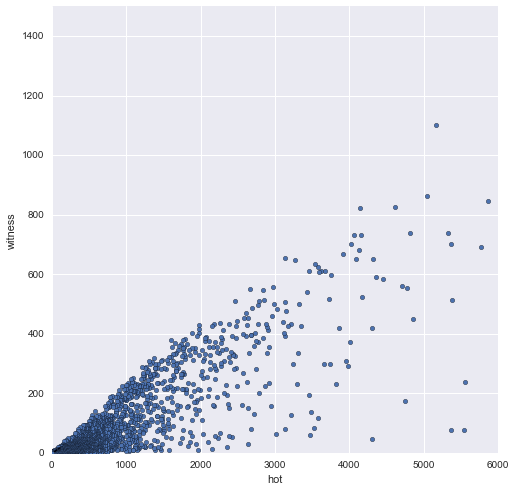

In [17]:
hot.plot(kind='scatter',
         x='hot',
         y = 'witness',
         xlim=(0,6000),
         ylim=(0,1500),
        figsize=(8,8))

再缩放：

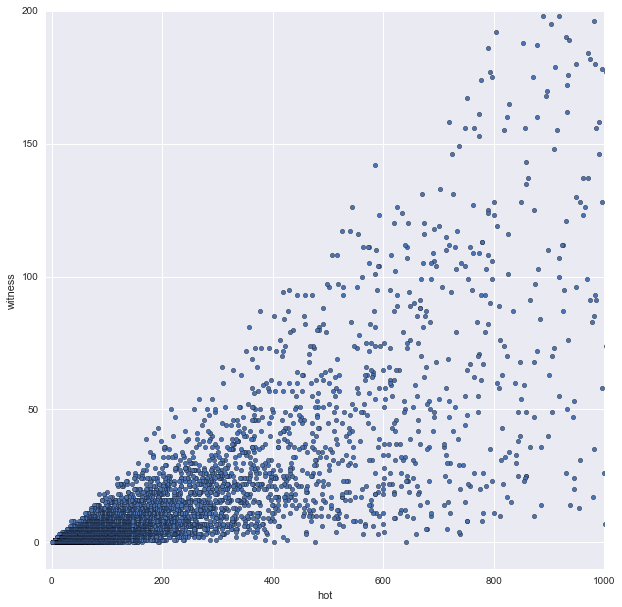

In [26]:
hot.plot(kind='scatter',
         x='hot',
         y='witness',
         xlim=(-10,1000),
         ylim=(-10,200),
         figsize=(10,10))

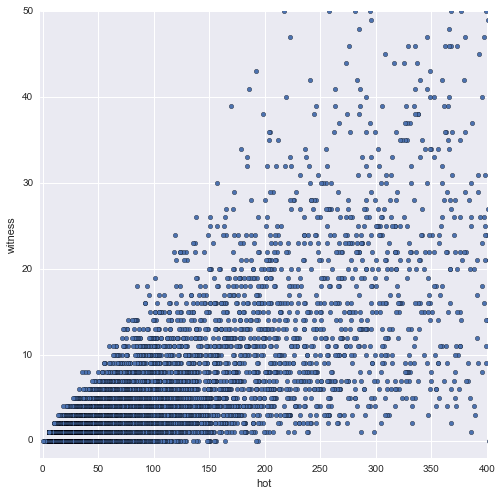

In [19]:
#继续
hot.plot(kind='scatter',
         x='hot',
         y='witness',
         xlim=(-2,400),
         ylim=(-2,50),
         figsize=(8,8))

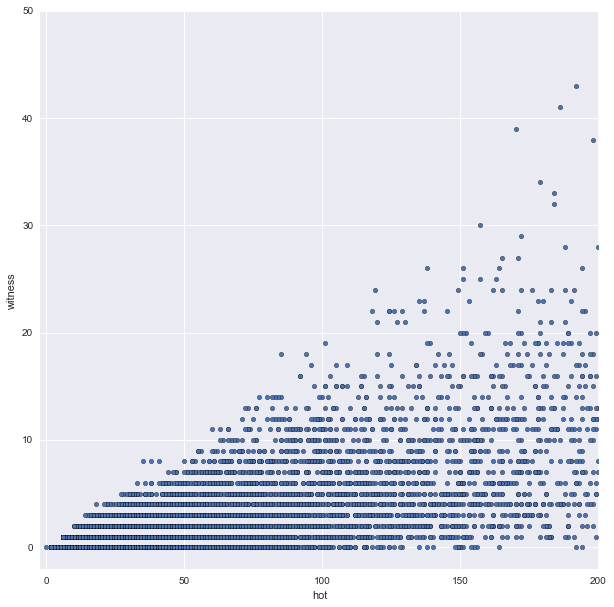

In [27]:
hot.plot(kind='scatter',
         x='hot',
         y='witness',
         xlim=(-2,200),
         ylim=(-2,50),
         figsize=(10,10))

可以看出区域（热度 <=150，见证人数 <= 20）的连载最多，颜色最深（点重叠得最多）。具体数据：

In [28]:
cold=hot[(hot.hot<=150) &(hot.witness <=20)]  # 多条件筛选中间用and会报错，得用&或|

In [29]:
print('非活跃连载数：',cold.shape[0])          # 热度≤150且见证人数≤20的连载有12342 个，占12342/15038 = 82.07%；
unknown_users=cold.uid.unique().shape[0]

print('非活跃用户数：',unknown_users)  #不能推出“不活跃用户有82.07%”。
                                    #有可能一个人创建了多个连载，活跃度也就分散在多个连载上，使得没有一个连载有高热度和高见证；
                                    # 也有可能连载设置为”仅自己可见“，数据没采集进来
active=7400-unknown_users
print('确定活跃用户数：',active)    #但可以充分肯定的是：活跃（热度>150,见证>20）的连载数在3000左右，约占18%。

非活跃连载数： 12342
非活跃用户数： 6907
确定活跃用户数： 493


In [30]:
hot[hot.hot<=150].shape 
#热度<=150的连载（后来热度的一个计算方式是：发1条动态热度加2）有12357个，占总体82.17%。会发现热度和见证数对活跃度的衡量基本是一致的。

(12357, 9)

In [142]:
#hot.hot.value_counts()  # 热度为2（即只发了1条状态）的连载有1344

## 从【参与见证他人连载的用户】分析不活跃用户量（不一定自己发连载，只看不写）

In [31]:
from qx_details import witness

In [32]:
w=list(witness.find({},{'results':1})) 

In [33]:
w=pd.DataFrame(w)

In [34]:
w=pd.DataFrame(w.results.sum()) #解放嵌套列表

In [35]:
len(w.witnessUid.unique()) #（参与见证的未重复的）总用户数约有16143人 ；每个连载网站最多只显示50个见证人信息，因此实际用户可能更多。
                            # 但目标是“活跃”的连载、活跃的见证人。被见证>50，则连载必然是活跃的；
                            # 可以分析用户参与了多少，参与得越多越活跃。

16143

### 一个用户见证了多少连载:

In [36]:
w.witnessUid.value_counts() #参与见证最多的用户统计:
                            #id（轻想号）为300614的用户，参与见证了至少1182个连载（因为只记录了活跃的连载，不活跃的连载未统计进来）
                            # 一些特别的轻想号，如100000、1234567是公司内部人员

300614      1182
100000      1107
61760808     920
1234567      496
23333        470
300589       467
100134       461
303738       455
1008611      427
306251       412
102843       411
309405       410
301190       390
279496       377
305411       376
297761       330
293424       322
666666       313
101233       312
307785       290
128820       290
100372       283
303452       276
282081       262
104939       250
123456       250
304904       247
298205       246
300216       237
282838       235
            ... 
197704         1
281915         1
289893         1
279866         1
291942         1
297153         1
283542         1
300512         1
281633         1
301059         1
308900         1
300704         1
290690         1
284549         1
289829         1
280455         1
274314         1
286329         1
103406         1
282171         1
275418         1
286660         1
281557         1
280519         1
308170         1
278005         1
309209         1
275502        

In [37]:
user=w[['nickName','witnessUid']]

In [38]:
user=user.drop_duplicates()

In [39]:
user=user.set_index('witnessUid')

In [40]:
user=user.reindex(w.witnessUid.value_counts().index)

In [41]:
user['见证连载数']=w.witnessUid.value_counts().values

In [42]:
user.head(20)

,nickName,见证连载数
300614,自渡,1182
100000,shane-小菜,1107
61760808,不成shou_,920
1234567,彼女,496
23333,朱阿便,470
300589,我其实真的很不错,467
100134,一只阿布,461
303738,浅川Hokusai,455
1008611,猴子勤劳的逗比,427
306251,李软咩咩咩咩咩,412


很难推测出活跃用户有多少，但见证连载数量少的用户，很大可能不活跃。即参与见证少≈不活跃：

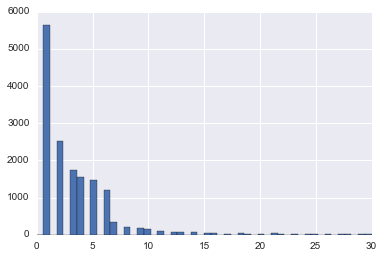

In [43]:
user['见证连载数'].hist(bins=50,range=(0,30))

In [44]:
user['见证连载数'].value_counts() #/16143 ：5637人,占比34.91%，只见证了1个连载；2531人

1       5636
2       2529
3       1748
4       1552
5       1476
6       1203
7        353
8        205
9        191
10       151
11       101
13        77
12        74
14        62
15        58
16        50
18        43
21        36
20        34
17        32
19        27
24        21
23        21
25        21
26        20
34        19
30        19
29        18
33        15
27        15
        ... 
87         1
103        1
199        1
215        1
125        1
117        1
109        1
85         1
410        1
51         1
83         1
91         1
115        1
139        1
155        1
163        1
235        1
283        1
411        1
427        1
247        1
1107       1
84         1
92         1
116        1
276        1
412        1
69         1
77         1
467        1
Name: 见证连载数, dtype: int64

# 结论：
* 用户样本量为7400中，约6.7%的用户活跃；
* 用户样本量16143中，约34.91%的用户不活跃。
* 待假设检验:总体中18%用户活跃，34.91%用户不活跃。
* to be continued...